In [1]:
# conda install pandas geopandas sqlalchemy
# pip install pytimekr

In [2]:
# next_state 다시보기1111111111111111111111111111111111111111

In [3]:
from src.simulator_03 import Simulator_01
import pandas as pd

db_info = {'host': 'localhost',
          'port': '5432',
          'db_name': 'postgres',
          'user_name': 'postgres',
          'password': 'postgres'}

simulator = Simulator_01(위치데이터_path = '../기초작업/data/강남3구_집계구_경계_중심.pickle', 
                         simulation_start_dt = '2024-05-01', 
                         simulation_end_dt = '2025-05-03',
                         db_info = db_info,
                         is_first = False)


In [4]:
init_states = simulator.make_init_states(sample_num = 1000)

In [5]:
# import time
# st = time.time()
# simulator.reset(선택최적 = -1, 선택rule = 'ruleX')
# while simulator.simulation_done == False:
#     simulator.step(actions = 1, is_reinforce = False)
# print(time.time() - st)

In [6]:
# import time
# st = time.time()
# simulator.reset(선택최적 = 0, 선택rule = 'ruleX')
# while simulator.simulation_done == False:
#     simulator.step(actions = 1, is_reinforce = False)
# print(time.time() - st)

In [7]:
from src.sac_lstm import SACAgent
import torch
import time
import numpy as np

# Hyperparameters
action_dim = 25
hidden_dim = 256
lr = 3e-4
batch_size = 64
num_episodes = 1000

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

# Initialize environment and agent
agent = SACAgent(action_dim = action_dim, hidden_dim = hidden_dim, lr = lr,  device = device, num_cars = len(simulator.차량데이터))
agent.load_model(path = './model/model.torch')

day_경과 = 0
응답속도s = []
best_score = 0

# for 단계 in range(2):
for 단계 in range(1):
    state = simulator.reset(선택최적 = 0, 선택rule = 'ruleX')
    done = False
    episode_reward = 0
    
    
    while simulator.simulation_done == False:
        tmp_st = time.time()
        actions = agent.select_action(state)
        
        next_state, reward, done = simulator.step(actions)
        응답속도s.append(time.time() - tmp_st)
        
        if (done[0] == 1):
            day_경과 += 1
            print('응답속도 평균: ', np.mean(응답속도s))
            print('응답속도 표준편차: ', np.std(응답속도s))
        # if (done[0] == 1) & (simulator.simulation_done == False):
            # s = next_state.pop(0)
        next_state.insert(0, [next_state[0][0], [[] for _ in range(25)]])
        
        # if day_경과 %10 == 0:
        #     agent.log_q_values(init_states)
        #     agent.plot_metrics()
                
                
            # tmp = 단계
            # if 단계 > 30:
            #     tmp = 30
            # for i in range(tmp):
            #     agent.store_transition((state[i], actions[i], reward, next_state.copy()[i], done[i]))
    
            
            # # s = next_state.pop(0)
            # # next_state.append([s[0], [[] for _ in range(25)]])
            # next_state.pop(0)
        # else:

        #     tmp = 단계
        #     if 단계 > 30:
        #         tmp = 30
        #     for i in range(tmp):
        #         agent.store_transition((state[i], actions[i], reward, next_state.copy()[i], done[i]))
        
            
        state = next_state
        # agent.update(batch_size, frame_idx = day_경과) 
        
        episode_reward += reward

        if simulator.count_total_수업수 > 2000:
            if best_score <= simulator.count_total_수업수/simulator.count_total_차량수:
                best_score = simulator.count_total_수업수/simulator.count_total_차량수
                agent.save_model(path = './model/model.torch')
                print('saved best model')
    
    print(f" Reward: {episode_reward}")

20240407


/home/yspark/driving-teacher-ai/시뮬레이션개발/src/sac_lstm.py:208: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  variable_length_tensors = torch.tensor(padded_variable_length_tensors, dtype=torch.float32).to(device)


20240408
하루 접속 고객 수     :   1    total 접속 고객 수  :   1   
하루 Rule 거절 횟수  :   0    total Rule 거절 횟수:   0   
하루 강화학습 거절 횟수  :   0    total 강화학습 거절 횟수:   0   
하루 예약자 수       :   1    total 예약자 수    :   1   
하루 예약자 비율      : 100.0  total 예약자 비율   : 100.0 
하루 수업 횟수       :   0    total 수업 횟수    :   0   
하루 실행 시간       :  0.37  총 실행 시간        :  0.38 


20240409
하루 접속 고객 수     :   0    total 접속 고객 수  :   1   
하루 Rule 거절 횟수  :   0    total Rule 거절 횟수:   0   
하루 강화학습 거절 횟수  :   0    total 강화학습 거절 횟수:   0   
하루 예약자 수       :   0    total 예약자 수    :   1   
하루 수업 횟수       :   0    total 수업 횟수    :   0   
하루 실행 시간       :  0.0   총 실행 시간        :  0.38 


응답속도 평균:  0.29708385467529297
응답속도 표준편차:  0.0
20240410
하루 접속 고객 수     :   1    total 접속 고객 수  :   2   
하루 Rule 거절 횟수  :   0    total Rule 거절 횟수:   0   
하루 강화학습 거절 횟수  :   1    total 강화학습 거절 횟수:   1   
하루 예약자 수       :   0    total 예약자 수    :   1   
하루 예약자 비율      :  0.0   total 예약자 비율   :  50.0 
하루 수업 횟수       :   0    total 수업 횟수    :   0   
하루 실행

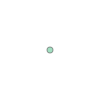

In [8]:
simulator.차량데이터.loc[simulator.차량데이터['차량코드'] == '0', '주차_point'].iloc[0]

In [9]:
simulator.차량데이터['차량코드'].to_list()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [10]:
simulator.count_total_차량당이동거리

20491.834224631308

In [11]:
import pandas as pd
a = pd.DataFrame(simulator.남은예약)
a

,예약_일시,예약_point,예약_point_idx,예약_차종,연월일,임시배정차량코드


In [12]:
for i in a['임시배정차량코드']:
    print(type(i))

In [13]:
a.iloc[0,1].distance(a.iloc[1,1])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
for i in range(1,1):
    print(i)

In [ ]:
simulator.차량데이터

In [ ]:
asdg

In [ ]:
actions[i]

In [ ]:
state[i]

In [ ]:
reward

In [ ]:
next_state.copy()[i]

In [ ]:
done[i]

In [ ]:
agent.replay_buffer1.buffer[251][3]

In [ ]:
agent.replay_buffer1.buffer[250][0]

In [ ]:
agent.replay_buffer1.buffer[250][3]

In [ ]:
agent.replay_buffer1.buffer[251][0]

In [ ]:
        if self.count_오늘_수업수 != 0:
            print("{:<15}".format('하루 차량당 수업횟수')+': ' "{:^6}".format(round((self.count_오늘_수업수/self.count_오늘_차량수), 2)), "{:<15}".format('total 차량당 수업횟수')+': ' "{:^6}".format(round((self.count_total_수업수/self.count_total_차량수), 2)))

In [ ]:
agent.replay_buffer.tree.tree.shape

In [ ]:
agent.replay_buffer.tree

In [ ]:
a = [1,2,3]*4
b = [1,2,3,4]
for i,j in zip(b,a):
    print(i, j)

In [ ]:
zip(a,b)

In [ ]:
zip(*(1,2))

In [ ]:
a = [[[0]*6, [[] for _ in range(25)]] for i in range(30)]

In [ ]:
len(a)

In [ ]:
len(a[10])

In [ ]:
a[10]

In [ ]:
len(state)

In [ ]:
state[10]

In [ ]:
[0]*6

In [ ]:
import random
batch_size = 64
batch = random.sample(agent.replay_buffer, batch_size)
states, actions, rewards, next_states, dones = zip(*batch)

In [ ]:
len(states)

In [ ]:
states[0]

In [ ]:
sadg

In [ ]:
# Initialize environment and agent
agent = SACAgent(action_dim = action_dim, hidden_dim = hidden_dim, lr = lr,  device = device, num_cars = len(simulator.차량데이터))
# agent.load_model(path = './model/model.torch')

In [ ]:
import random
batch = random.sample(agent.replay_buffer, batch_size)
states, actions, rewards, next_states, dones = zip(*batch)

In [ ]:
states

In [ ]:
agent.critic1_losses

In [ ]:
agent.actor_losses

In [ ]:
state = simulator.reset(선택최적 = 0, 선택rule = 'ruleX')
actions = agent.select_action(state)
actions

In [ ]:
actions = []
며칠뒤 = 30
agent.load_model(path = './model/model.torch')
from src.utils import state_to_tensor
for i in range(며칠뒤):
    agent.actor.eval()
    # self.actors[i].eval()
    with torch.no_grad():
        continuous_vars, variable_length_tensors = state_to_tensor(state[i], agent.device, agent.num_cars)
        mu, std = agent.actor(continuous_vars, variable_length_tensors)
        # mu, std = self.actors[i](continuous_vars, variable_length_tensors)
        dist = torch.distributions.Normal(mu, std)
        action = dist.sample()
        action = torch.tanh(action)
    agent.actor.train()
    # self.actors[i].train()
    actions.append(action.cpu().numpy())

In [ ]:
mu

In [ ]:
std

In [ ]:
dist.sample()

In [ ]:
action

In [ ]:
simulator.차량데이터

In [ ]:
import pandas as pd


In [ ]:
simulator.위치데이터.sample(n=100)['count'].iloc[0]

In [ ]:
len(state)

In [ ]:
for i in range(len(state)):
    for j in range(len(state[i][1])):
        if len(state[i][1][j]) >= 10:
            print(i, j)
            print(len(state[i][1][j]))
state[0]

In [ ]:
simulator.차량데이터

In [ ]:
import pandas as pd
남예 = pd.DataFrame(simulator.남은예약)
남예

In [ ]:
state[0][1]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal
from src.sac_lstm import pad_variable_length_tensors
x1 = torch.relu(nn.Linear(3, 128)(continuous_vars))  # (batch_size, 128)
x1 = x1.unsqueeze(1).repeat(1, 10, 1)  # (batch_size, 10, 128) to match x2

variable_length_tensors = pad_variable_length_tensors(variable_length_tensors, device)
padded_seqs = torch.cat(variable_length_tensors, dim=0)  # (batch_size, max_length, 1)
x2, _ = nn.LSTM(1, 128, batch_first=False)(padded_seqs)  # (batch_size, max_length, 128)

In [ ]:
x = torch.cat([x1, x2], dim=0)
x = x.view(x.size(0), -1)
x.size()

In [ ]:
x1 = torch.relu(nn.Linear(3, 64)(continuous_vars))
# x1 = x1.unsqueeze(0)  # 2차원 텐서로 확장

In [ ]:
x2 = x2.view(x2.size(0), -1)
x2.size()

In [ ]:
x2.size()

In [ ]:
x1.size()

In [ ]:
variable_length_tensors = pad_variable_length_tensors(variable_length_tensors, device)
padded_seqs = torch.cat(variable_length_tensors, dim=0)
lengths = torch.tensor([seq.size(1) for seq in variable_length_tensors]).to(device)
packed_seqs = nn.utils.rnn.pack_padded_sequence(padded_seqs, lengths, batch_first=True, enforce_sorted=False).to(device)

In [ ]:
packed_seqs

In [ ]:
x2, _ = nn.LSTM(num_layers = 25, hidden_size = 25, input_size = 3, batch_first=False)(packed_seqs)

In [ ]:
def pad_variable_length_tensors(tensors, device):
    max_length = max(tensor.size(1) for tensor in tensors)
    padded_tensors = []
    for tensor in tensors:
        padding = torch.zeros((tensor.size(0), max_length - tensor.size(1)), dtype=torch.float32).to(device)
        padded_tensor = torch.cat([tensor, padding], dim=1)
        padded_tensors.append(padded_tensor)
    return padded_tensors

In [ ]:
import time
st = time.time()
simulator.reset(선택최적 = -1, 선택rule = 'ruleX')
for _ in range(40):
    simulator.step(action = 1)
print(time.time() - st)

In [ ]:
for _ in range(100):
    state, reward, done = simulator.step(action = 1)
    print(state)
    print(reward)
    print(done)

In [ ]:
# import time
# st = time.time()
# simulator.reset(선택최적 = 0, 선택rule = 'ruleX')
# while simulator.simulation_done == False:
#     simulator.step(action = 1)
# print(time.time() - st)

In [ ]:
sdg

In [ ]:
import time
st = time.time()
simulator.run(선택최적 = -1, 선택rule = 'ruleX')
print(time.time() - st)